# Week 05: In-Class Assignment: <br> Missingness

![planets](https://exoplanets.nasa.gov/internal_resources/1806)

The goal of today's ICA is to become familiar with some of the tools for dealing with missingness in a dataset. The dataset you will use is the planets dataset, which is easily obtained from Seaborn.

This ICA might be a little long - it was originally designed to be done across two ICAs, but with 50-minute classes. We only have 80 minutes today. Don't worry about finishing: I highly prefer you go very slowly, understand everything you are doing and be able to leave on time at 9:50 than to get all of the way through it. For those of you who do want to get everything out of this, feel free to turn it later. You only need to submit one per group; be sure everyone's name appears. 


### Instructions for Submitting

Please follow the format below when typing your names in the notebook. This is **mandatory** for all group submissions.
**Each student** will turn in a notebook. Note that this is different from the first ICA. You will still work together, but you will come up with your own answers.

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**
- Separate each member's name with a **semicolon (;)**
- Do **not** include any extra text or formatting.
- **Delete this instruction text** and replace it with your names.

#### Example:
    Doe, Jane Marie; Smith, John Alan; Lee, Anna Grace;

⚠️ **Failure to follow this format will result in a reduction of your grade.**

Put your names in the next markdown cell

Toaz, Benjamin Ryan;  Ni, Zhiqiang; Cho, Jungbum

🗒️ **Task:** Your first task is to read the next few cells, where I will get you started. 

Let's first get the dataset and look at what it contains. Do you see any possible issues with missingness? 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("planets")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


As I mentioned in the lecture, it is good EDA practice to visualize the missing data in the dataset. 

In particular, discuss with your group possible missingness issues. That is, it is clear there is missing data, but what do you think about its missingness? As a reminder: is the data missing in a given column random, or is it grouped? For those columns that are grouped, how are they grouped - is there a pattern? Or, is the missing data in one column correlated with values in another colulmn or missing data in another column? 

There is some code; play with various ways to visualize the missingness. It is likely you will want plots of this kind for your project.


✏️ **Answer:** 
*Put your answer here*

<Axes: >

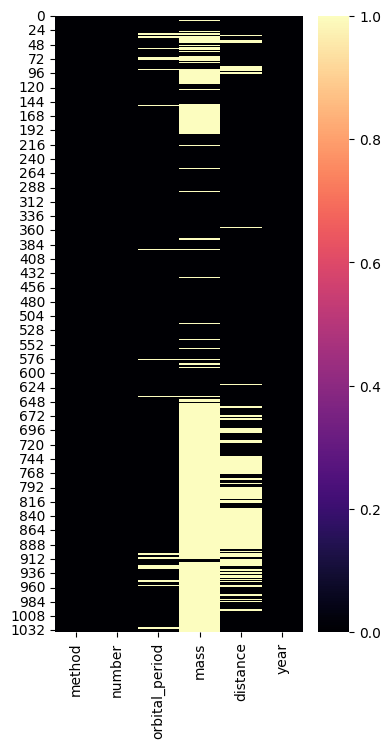

In [2]:
# plt.figure(figsize=(20,4))
plt.figure(figsize=(4,8))
# sns.heatmap(df.isna().transpose(), cmap="plasma")
# sns.heatmap(df.isna(), cmap="viridis")
sns.heatmap(df.isna(), cmap="magma")

In your discussion, include the concept of missingness patterns. In the lecture, I focused on missingness qualitites (MCAR, MAR and MNAR); but, one can also view missingness as a _pattern_. Patterns and qualitites are not the same, but they also overlap. From the slides, here is a diagram and table to describe these patterns:

![miss_patt](https://muratkoptur.com/MyDsProjects/MissingData/images/paste-82A43477.webp)

| Pattern | Description | Example | Potential Mechanism | Challenges | Handling Strategies |
|---------|-------------|---------|---------------------|------------|---------------------|
| Univariate | Missing data occurs in only one variable | Income data missing for some participants | Can be MCAR, MAR, or MNAR | Relatively simple to address | Single imputation, multiple imputation, or complete case analysis depending on mechanism |
| Monotone | If a variable is missing, all subsequent variables are also missing | Longitudinal study where participants drop out over time | Often MAR, but can be MCAR or MNAR | Common in longitudinal data | Special imputation methods for monotone patterns, mixed-effects models |
| General | No clear pattern to the missing data | Multiple variables have missing values with no apparent structure | Can be MCAR, MAR, or MNAR | Most complex to handle | Multiple imputation, maximum likelihood methods |
| Planned | Missingness is deliberately introduced into the study design | Matrix sampling in surveys, where different subsets of questions are given to different respondents | Usually MCAR if properly designed | Can reduce respondent burden but increases complexity of analysis | Planned missing data designs, multiple imputation |
| Latent | Missingness is related to an unmeasured (latent) variable | Depression affects both survey participation and responses | Often leads to MNAR | Difficult to detect and address | Sensitivity analysis, selection models, pattern-mixture models |
| Underidentified | Not enough observed data to estimate missing data parameters | Too many variables with missing data relative to observed data | Can occur with any mechanism | Makes it impossible to fully recover missing information | Requires strong assumptions or additional data sources |

Key points to remember:
1. These patterns are not mutually exclusive and can co-occur in a dataset.
2. The pattern of missingness is distinct from the mechanism of missingness (MCAR, MAR, MNAR), though certain patterns are more likely to be associated with certain mechanisms.
3. Identifying the pattern of missingness can guide the choice of appropriate handling strategies.
4. In real-world datasets, a combination of these patterns may be present, requiring a nuanced approach to missing data analysis.

👉🏻 Summarize your discussions in a markdown cell.

✏️ **Answer:** 
*Put your answer here*

🗒️ **Task:** Next, we'll make a base heatmap of the correlations and a pairplot. What does Python do with the missing values when we do this? It is important to understand what different libraries do when they encounter missing values. If the library simply drops them, and there is correlation/bias in the missingness, then the library is processing and producing biased data.

👉🏻 Can you find documentation online that tell you what these tools do with missing values? If you can find it, what rule does it use? Could this cause a problem with interpretation? Are these visualizations misleading? 

✏️ **Answer:** 
*Put your answer here*

<Axes: >

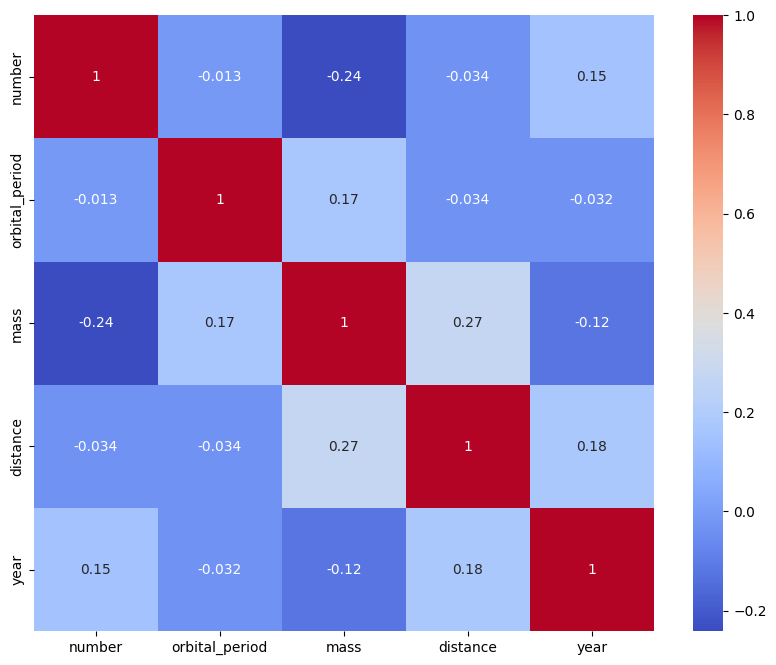

In [3]:
numeric_cols_1 = df.select_dtypes(include=[np.number])
corr_matrix_1 = numeric_cols_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm')

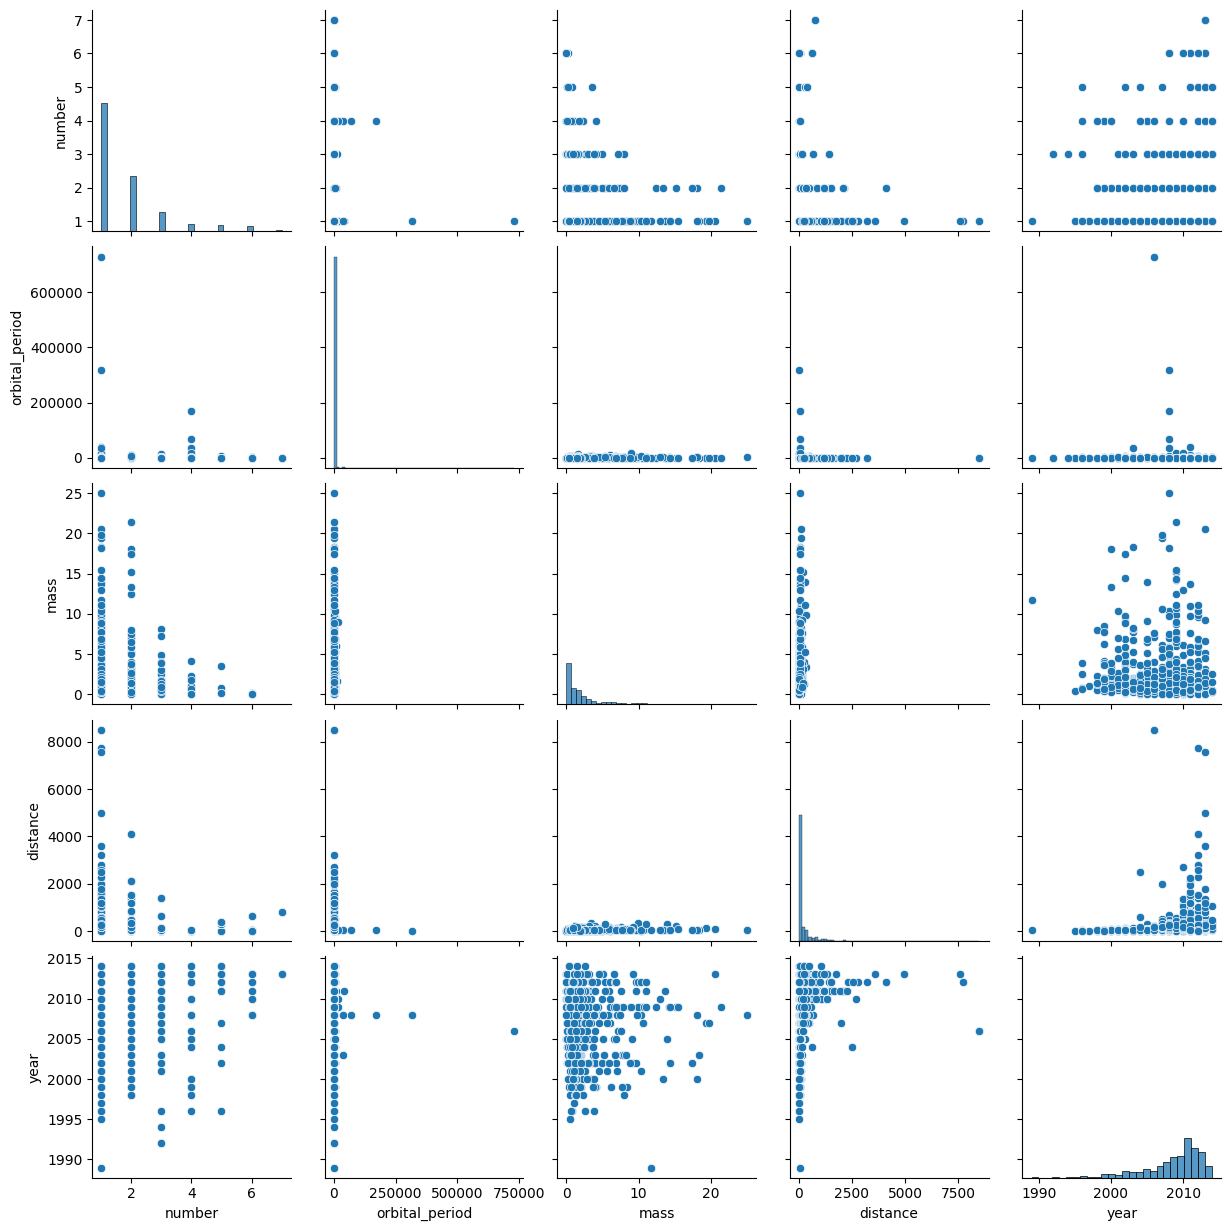

In [4]:
sns.pairplot(df)

Next, we are going to try to give a bit of an answer to the above question by making a new column in the dataframe that we can use to color code by a column having missing data (or not). 

🗒️ **Task:** Discuss the following code with your group members, and create a markdown cell where you explain what each line of code is doing. 

In the pairplot, why are there no orange points in the row and column with the mass variable? Does the pairplot give you additional insights into missingness? 

Try columns other than "mass" to ensure you understand what is happening here. 


✏️ **Answer:** 
*Put your answer here*

In [5]:
df["was_NaN"] = False
df.loc[df["mass"].isnull() == True, "was_NaN"] = True
df.head(8)

,method,number,orbital_period,mass,distance,year,was_NaN
0,Radial Velocity,1,269.300,7.10,77.40,2006,False
1,Radial Velocity,1,874.774,2.21,56.95,2008,False
2,Radial Velocity,1,763.000,2.60,19.84,2011,False
3,Radial Velocity,1,326.030,19.40,110.62,2007,False
4,Radial Velocity,1,516.220,10.50,119.47,2009,False
5,Radial Velocity,1,185.840,4.80,76.39,2008,False
6,Radial Velocity,1,1773.400,4.64,18.15,2002,False
7,Radial Velocity,1,798.500,NaN,21.41,1996,True


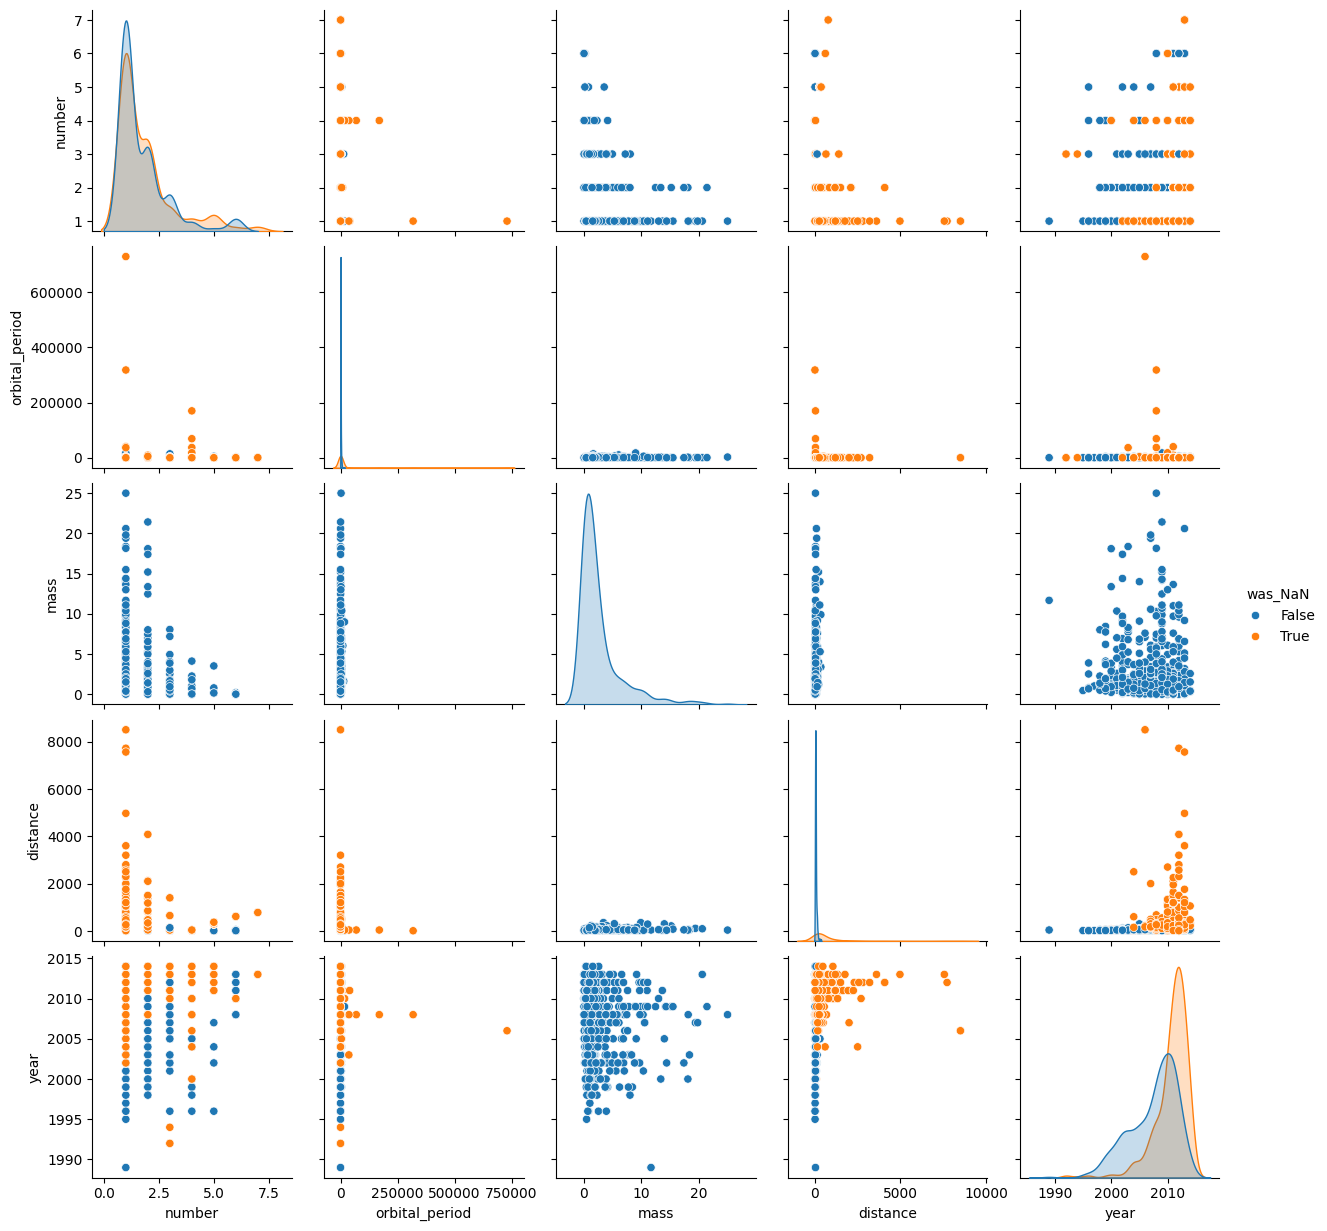

In [6]:
sns.pairplot(df, hue="was_NaN")

🗒️ **Task:** Discuss this code with your group. What does it do?

In [8]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.nan)

# impute after temporarily removing the methods column
X = df.drop(columns="method")
imputed_X = my_imp.fit_transform(X)

# create DataFrame with correct column names and index
fixed_X = pd.DataFrame(imputed_X, columns=X.columns, index=X.index)

# add the 'method' column back
fixed_df = pd.concat([fixed_X, df["method"]], axis=1)

# ensure the columns are in the same order as the original DataFrame
fixed_df = fixed_df[df.columns]


🗒️ **Task:** Next, you are on your own to explore. Show us what you can do! 

One basic idea is to examine the new dataframe to see what `SimpleImputer` did. For example, to get you started, we can look at the correlations with the new dataframe. [Try different options](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) in `SimpleImputer` as well as other imputers. You can also make a new pairplot. You can use `.describe` to explore what the imputer did. And, so on....explore.

For example, does your conclusion about the correlations in the data change after you have imputed? Can you connect with missingness types?

Either open a markdown cell to describe your findings, or put really good titles on your plots so that the TA can figure out what you did!

In [9]:
fixed_df

,method,number,orbital_period,mass,distance,year,was_NaN
0,Radial Velocity,1.0,269.300000,7.100000,77.40,2006.0,0.0
1,Radial Velocity,1.0,874.774000,2.210000,56.95,2008.0,0.0
2,Radial Velocity,1.0,763.000000,2.600000,19.84,2011.0,0.0
3,Radial Velocity,1.0,326.030000,19.400000,110.62,2007.0,0.0
4,Radial Velocity,1.0,516.220000,10.500000,119.47,2009.0,0.0
...,...,...,...,...,...,...,...
1030,Transit,1.0,3.941507,2.638161,172.00,2006.0,1.0
1031,Transit,1.0,2.615864,2.638161,148.00,2007.0,1.0
1032,Transit,1.0,3.191524,2.638161,174.00,2007.0,1.0
1033,Transit,1.0,4.125083,2.638161,293.00,2008.0,1.0


Text(0.5, 1.0, 'Correlation Heatmap of Fixed DataFrame')

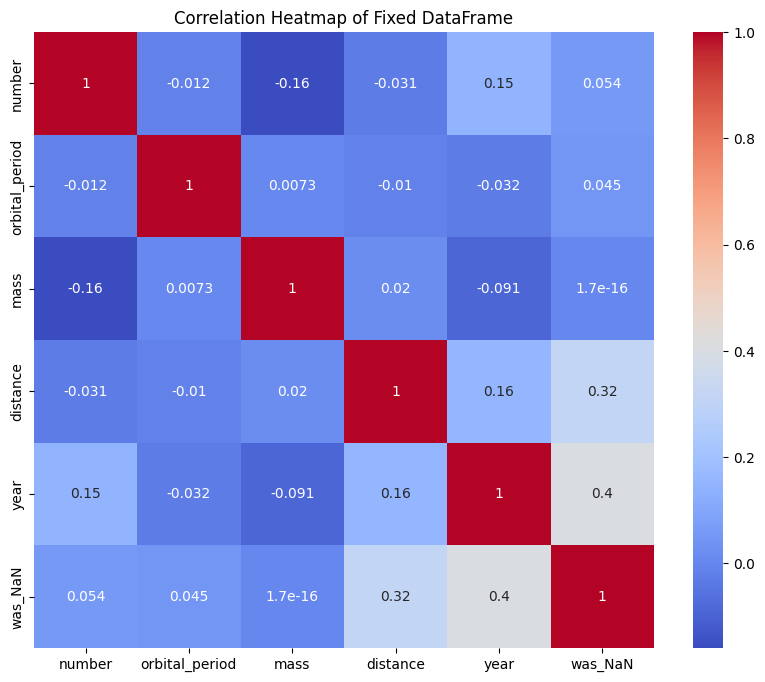

In [10]:
numeric_cols = fixed_df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Fixed DataFrame')

🗒️ **Task:** Your final goal is to learn how to create data with certain missingness properties and to learn to identify it in visualizations. Think through the definitions of MCAR, MAR and MNAR so that you can make these types of datasets ``by hand''. (It is much easier to make these datasets than to diagnose and repair them!)

What you will do is make three fake datasets and make two heatmaps for each:
* one that shows the structure of missing data,
* another that shows correlations. 

You have already made visualizations like these above, so there is nothing new here. 

The three datasets you make should have strong missingness characteristics: MCAR, MAR and MNAR. 

Be sure to use your whiteboards for dicussions and the screens to share your results with others in your group. 

I'll give some quick code to show the basic idea, although you are free to code this any way you wish. This is a small dataset, which is easy to type in: you might want to build something much larger using `range` or `linspace` or anything else; use whatever Python libraries you need. 

In [11]:
# make a dataset "by hand" with certain qualities/patterns

my_dict = {'col_1': [3, np.nan, 1, 0], 'col_2': ['a', 'b', np.nan, 'd'], 'col_3': [np.nan, 'x', np.nan, 'z']}
my_df = pd.DataFrame.from_dict(my_dict)

In [12]:
my_df

,col_1,col_2,col_3
0,3.0,a,NaN
1,NaN,b,x
2,1.0,NaN,NaN
3,0.0,d,z


<Axes: >

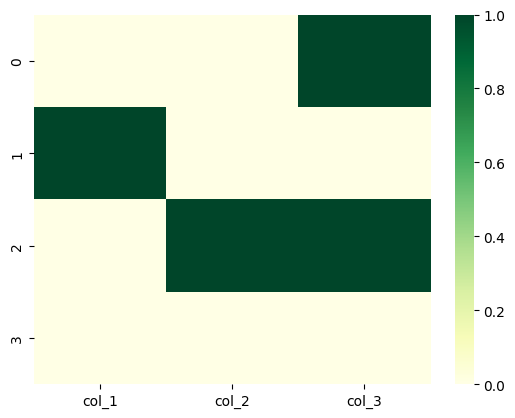

In [13]:
sns.heatmap(my_df.isna(), cmap="YlGn")

---

## Congratulations, you’re done!

Submit this assignment by uploading it to the course Desire2Learn web page. Go to the “In-class assignments” folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.